In [1]:
import os
import cv2

os.environ["BLIS_NUM_THREADS"] = "8"
os.environ["OMP_NUM_THREADS"] = "8"
cv2.setNumThreads(8) 

from fast_bfmatcher.benchmark import benchmark_cc_matchers

In [2]:
benchmark_cc_matchers()

TFL2BFMatcher requires eager mode to be enabled! Call tf.enable_eager_execution() first.
Skipping tensorflow benchmark, got error: TFL2BFMatcher requires eager mode to be enabled! Call tf.enable_eager_execution() first.

>> Benchmarking matchers ...
fast                 calls : 100 steps took  1.363 [s], per step 13.631 [ms] 
opencv               calls : 100 steps took  5.346 [s], per step 53.464 [ms] 
numpy                calls : 100 steps took  4.941 [s], per step 49.406 [ms] 

>> Benchmarking distance matrix computation ...
fast                 calls : 100 steps took  1.297 [s], per step 12.975 [ms] 
numpy                calls : 100 steps took  2.681 [s], per step 26.806 [ms] 

>> Benchmarking find row col min values and indices ...
fast                 calls : 100 steps took  0.704 [s], per step  7.044 [ms] 
numpy                calls : 100 steps took  0.917 [s], per step  9.173 [ms] 


# Matching benchmark

In [3]:
from fast_bfmatcher.benchmark import benchmark_cc_rt_size_scan
import pandas as pd
metrics = benchmark_cc_rt_size_scan(step = 1000)

fast-rt N=100: 1 steps took  0.002 [s], per step  2.327 [ms] 
fast-rt N=1100: 1 steps took  0.080 [s], per step 79.785 [ms] 
fast-rt N=2100: 1 steps took  0.175 [s], per step 174.967 [ms] 
fast-rt N=3100: 1 steps took  0.377 [s], per step 377.290 [ms] 
fast-rt N=4100: 1 steps took  0.820 [s], per step 820.261 [ms] 
fast-rt N=5100: 1 steps took  1.033 [s], per step 1032.558 [ms] 
fast-rt N=6100: 1 steps took  1.891 [s], per step 1891.159 [ms] 
fast-rt N=7100: 1 steps took  2.071 [s], per step 2070.629 [ms] 
fast-rt N=8100: 1 steps took  2.549 [s], per step 2549.266 [ms] 
fast-rt N=9100: 1 steps took  3.178 [s], per step 3178.379 [ms] 
fast-cc N=100: 1 steps took  0.002 [s], per step  2.210 [ms] 
fast-cc N=1100: 1 steps took  0.046 [s], per step 45.960 [ms] 
fast-cc N=2100: 1 steps took  0.204 [s], per step 204.089 [ms] 
fast-cc N=3100: 1 steps took  0.523 [s], per step 522.960 [ms] 
fast-cc N=4100: 1 steps took  0.922 [s], per step 922.291 [ms] 
fast-cc N=5100: 1 steps took  1.108 [s], 

Text(0, 0.5, 'Time [ms]')

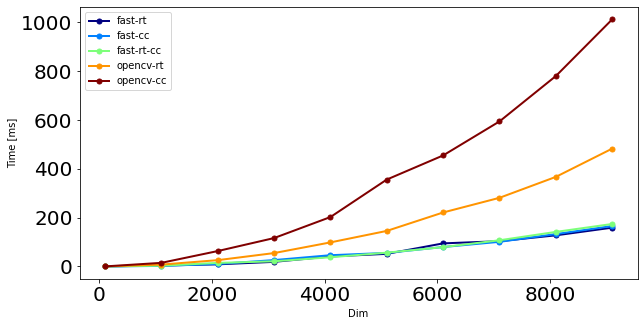

In [4]:
df = pd.DataFrame(metrics)
ax = df.set_index("size").plot(lw=2, colormap='jet', marker='.', markersize=10, figsize=(10, 5), fontsize=20)
ax.set_xlabel("Dim")
ax.set_ylabel("Time [ms]")

# Distance matrix 

In [5]:
import numpy as np
from scipy.spatial import distance_matrix

X = np.random.randn(1000, 512).astype(np.float32)
%timeit -n 3 distance_matrix(X, X)

922 ms ± 68.4 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [6]:
from fast_bfmatcher import l2_distance_matrix
%timeit -n 3 l2_distance_matrix(X, X)

The slowest run took 9.07 times longer than the fastest. This could mean that an intermediate result is being cached.
11.4 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [7]:
D1 = distance_matrix(X, X)
D2 = np.sqrt(np.maximum(l2_distance_matrix(X, X), 0))

np.abs(D1 - D2).max() / D1.max()

0.0006924857202005975